<a href="https://colab.research.google.com/github/gudes-marcia/Google-Ads-Regression/blob/main/Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Libraries

In [ ]:
import pandas as pd
import seaborn as srn
import statistics  as sts
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from graphviz import Digraph
from IPython.display import Image

# Dataset Upload

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/1jd3c7CpUC0pgSxLVYXSFncqVEea3hLOivc3MlNq-axo/gviz/tq?tqx=out:csv'

In [ ]:
dataset = pd.read_csv(url)

In [ ]:
dataset.head()

,Campaign Name,Clicks,Impressions,CPC,CTR,Conversions,CVR
0,Campaign 1,727.0,10080,$1.00,7.21%,44,6.05%
1,Campaign 2,719.0,7986,$1.13,9.00%,43,5.98%
2,Campaign 3,290.0,3229,$1.14,8.98%,17,5.86%
3,Campaign 4,546.0,7272,$1.03,7.51%,32,5.86%
4,Campaign 5,273.0,3030,$1.03,9.01%,16,5.86%


# Data Exploration



In [ ]:
# Size
dataset.shape


(500, 7)

In [ ]:
# Data Type
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Campaign Name  500 non-null    object 
 1   Clicks         499 non-null    float64
 2   Impressions    500 non-null    int64  
 3   CPC            499 non-null    object 
 4   CTR            499 non-null    object 
 5   Conversions    500 non-null    int64  
 6   CVR            499 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 27.5+ KB
None


In [ ]:
# Statistical Description
dataset.describe()

,Clicks,Impressions,Conversions
count,499.000000,500.000000,500.000000
mean,589.042084,7089.748000,28.224000
std,233.816528,3700.703581,11.949368
min,202.000000,2004.000000,8.000000
25%,376.500000,4254.750000,18.000000
50%,583.000000,6358.000000,28.000000
75%,780.000000,8835.000000,36.250000
max,1000.000000,19414.000000,58.000000


# Data Cleaning

In [ ]:
# Removal of Irrelevant Columns
dataset = dataset.drop(['Campaign Name', 'CVR', 'CTR'], axis=1)

In [ ]:
dataset.head()

,Clicks,Impressions,CPC,Conversions
0,727.0,10080,$1.00,44
1,719.0,7986,$1.13,43
2,290.0,3229,$1.14,17
3,546.0,7272,$1.03,32
4,273.0,3030,$1.03,16


In [ ]:
# Removal of Symbols ($, %)
dataset['CPC'] = dataset['CPC'].str.replace('[^\d.]', '', regex=True)
print(dataset['CPC'])

0      1.00
1      1.13
2      1.14
3      1.03
4      1.03
       ... 
495    0.80
496    0.80
497    0.80
498    0.80
499    0.80
Name: CPC, Length: 500, dtype: object


In [ ]:
# Check NAN
dataset.isnull().sum()

,0
Clicks,1
Impressions,0
CPC,1
Conversions,0


In [ ]:
# Replacement of Nulls with Median Values
mediana_clicks = dataset['Clicks'].median()
dataset['Clicks'].fillna(mediana_clicks, inplace=True)
mediana_cpc = dataset['CPC'].median()
dataset['CPC'].fillna(mediana_cpc, inplace=True)

In [ ]:
dataset.isnull().sum()

,0
Clicks,0
Impressions,0
CPC,0
Conversions,0


In [ ]:
# Checking for duplicates
num_dup = dataset.duplicated().sum()
print(num_dup)

1


In [ ]:
dataset = dataset.drop_duplicates()


In [ ]:
num_dup = dataset.duplicated().sum()
print(num_dup)

0


# Data Transformation

In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Clicks       499 non-null    float64
 1   Impressions  499 non-null    int64  
 2   CPC          499 non-null    object 
 3   Conversions  499 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 19.5+ KB
None


In [ ]:
# Converting Object to Numeric
dataset['CPC'] = pd.to_numeric(dataset['CPC'], errors='coerce')
print(dataset['CPC'])

0      1.00
1      1.13
2      1.14
3      1.03
4      1.03
       ... 
495    0.80
496    0.80
497    0.80
498    0.80
499    0.80
Name: CPC, Length: 499, dtype: float64


In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Clicks       499 non-null    float64
 1   Impressions  499 non-null    int64  
 2   CPC          499 non-null    float64
 3   Conversions  499 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 19.5 KB
None


# Data Visualization

In [ ]:
# Statistical Description
dataset.describe()

,Clicks,Impressions,CPC,Conversions
count,499.000000,499.000000,499.000000,499.000000
mean,589.767535,7099.533066,1.360080,28.260521
std,233.233181,3697.936927,11.155962,11.933394
min,202.000000,2004.000000,0.440000,8.000000
25%,377.500000,4267.500000,0.640000,18.000000
50%,583.000000,6358.000000,0.820000,28.000000
75%,780.000000,8843.000000,1.100000,36.500000
max,1000.000000,19414.000000,250.000000,58.000000


## Clicks

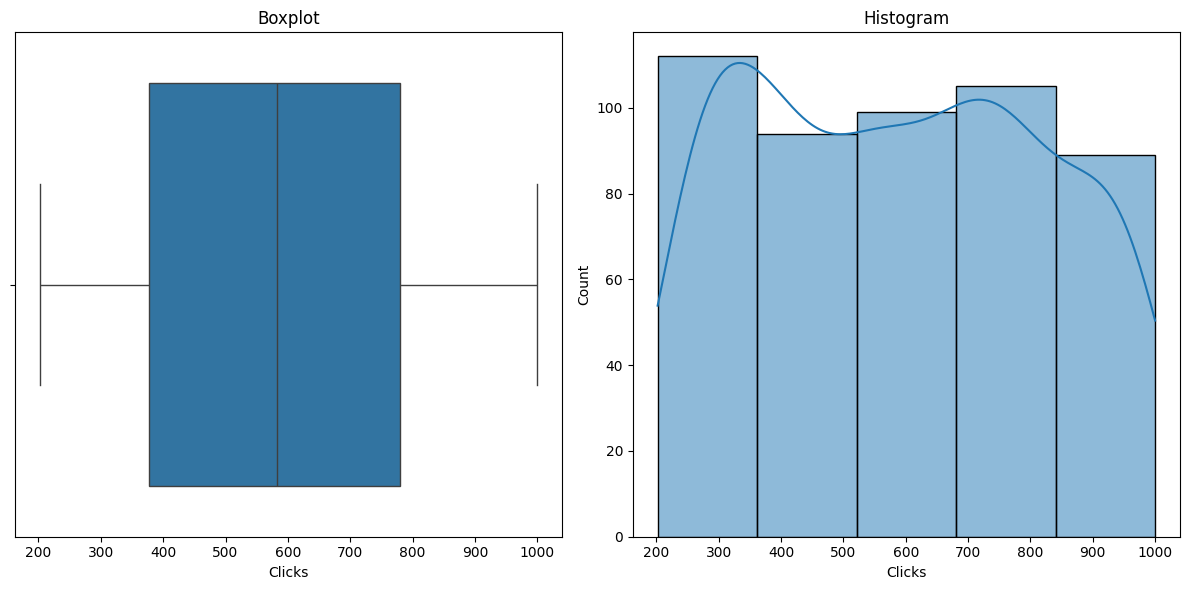

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
srn.boxplot(x=dataset['Clicks'], ax=ax[0])
ax[0].set_title('Boxplot')
srn.histplot(dataset['Clicks'], bins=5, kde=True, ax=ax[1])
ax[1].set_title('Histogram')
plt.tight_layout()
plt.show()

## Impressions

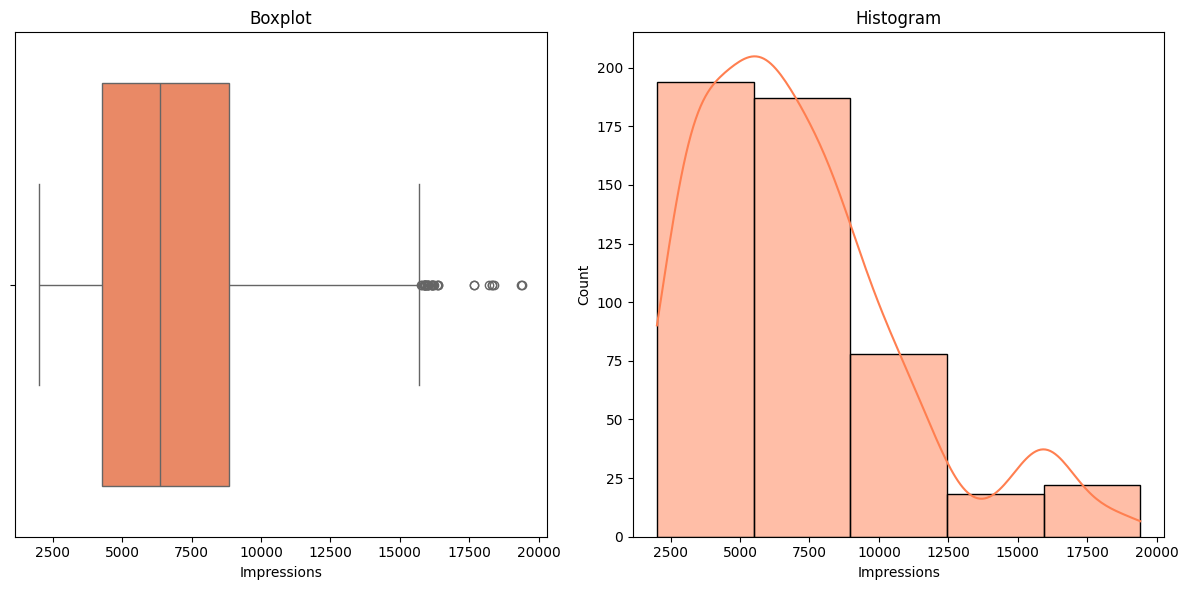

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
srn.boxplot(x=dataset['Impressions'], ax=ax[0],color='coral')
ax[0].set_title('Boxplot')
srn.histplot(dataset['Impressions'], bins=5, kde=True, ax=ax[1],color='coral')
ax[1].set_title('Histogram')
plt.tight_layout()
plt.show()

## CPC

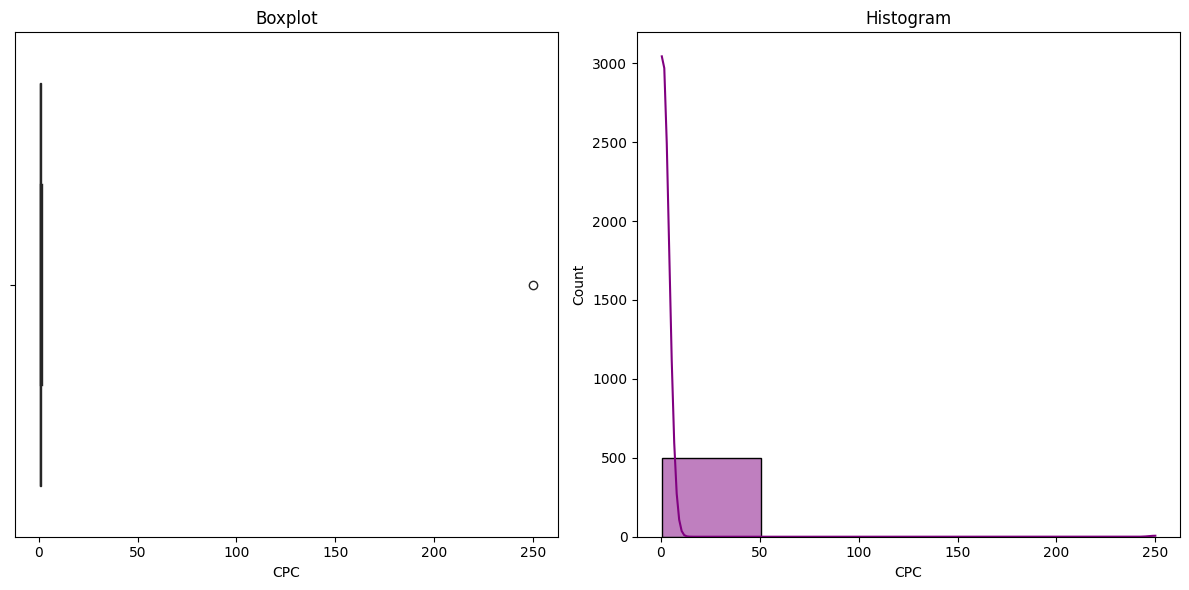

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
srn.boxplot(x=dataset['CPC'], ax=ax[0],color='purple')
ax[0].set_title('Boxplot')
srn.histplot(dataset['CPC'], bins=5, kde=True, ax=ax[1],color='purple')
ax[1].set_title('Histogram')
plt.tight_layout()
plt.show()

## Conversions

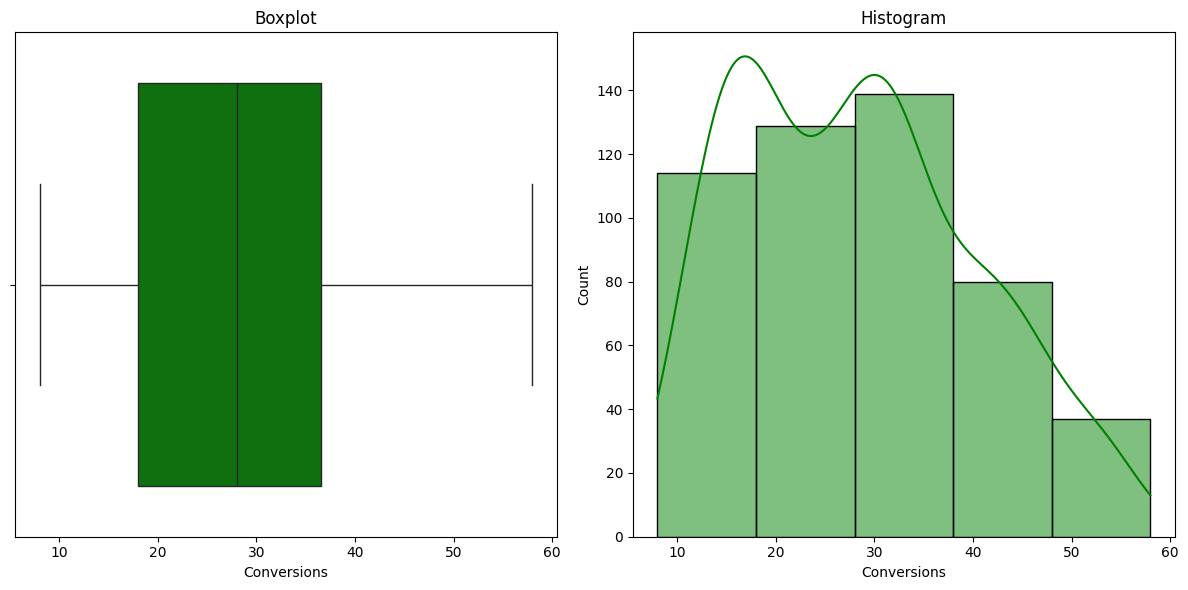

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
srn.boxplot(x=dataset['Conversions'], ax=ax[0],color='green')
ax[0].set_title('Boxplot')
srn.histplot(dataset['Conversions'], bins=5, kde=True, ax=ax[1],color='green')
ax[1].set_title('Histogram')
plt.tight_layout()
plt.show()

# Data Treatment

In [ ]:
# Set a CPC range
Q1 = dataset['CPC'].quantile(0.25)
Q3 = dataset['CPC'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
out_cpc = dataset[(dataset['CPC'] < limite_inferior) | (dataset['CPC'] > limite_superior)]
print(out_cpc)


     Clicks  Impressions    CPC  Conversions
242   748.0        10241  250.0           34


In [ ]:
# Removing Outliers
dataset = dataset[(dataset['CPC'] >= limite_inferior) & (dataset['CPC'] <= limite_superior)]
dataset.shape

(498, 4)

<Axes: xlabel='CPC'>

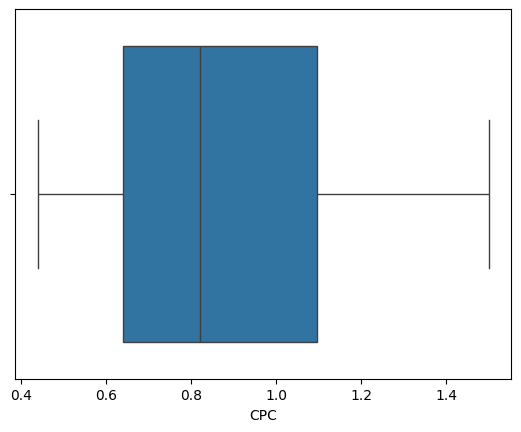

In [ ]:
srn.boxplot(x=dataset['CPC'])

# Machine Learning

## Defining Variables

In [ ]:
print(dataset)

     Clicks  Impressions   CPC  Conversions
0     727.0        10080  1.00           44
1     719.0         7986  1.13           43
2     290.0         3229  1.14           17
3     546.0         7272  1.03           32
4     273.0         3030  1.03           16
..      ...          ...   ...          ...
495   561.0         4045  0.80           33
496   527.0         4924  0.80           31
497   664.0         6666  0.80           39
498   545.0         6826  0.80           32
499   358.0         3986  0.80           21

[498 rows x 4 columns]


In [ ]:
X = dataset[['Clicks', 'Impressions', 'CPC']]
y = dataset['Conversions']

## Training and Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
X_test_scaled = scaler.transform(X_test)

## Linear Regression Model

In [ ]:
linear_model = LinearRegression()

In [ ]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = linear_model.predict(X_test)

In [ ]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
coefficients = pd.DataFrame(linear_model.coef_, X.columns, columns=['Coefficient'])

In [ ]:
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)
print("Coeficientes:\n", coefficients)
print("Intercepto:", linear_model.intercept_)

Mean Squared Error (MSE): 36.40060912426371
R² Score: 0.6945324820308911
Coeficientes:
              Coefficient
Clicks          0.045656
Impressions    -0.000050
CPC             0.624801
Intercepto: 1.1603266523284645


In [ ]:
formula_linear = f"Y = {linear_model.intercept_:.4f}"
for i, coef in enumerate(linear_model.coef_):
    formula_linear += f" + {coef:.4f} * X{i + 1}"

In [ ]:
print("Multiple Linear Regression:")
print(formula_linear)

Multiple Linear Regression:
Y = 1.1603 + 0.0457 * X1 + -0.0001 * X2 + 0.6248 * X3


## Ridge Model

In [ ]:
ridge_model = Ridge(alpha=1.0)  # O parâmetro alpha controla a penalização
ridge_model.fit(X_train, y_train)


Ridge()

In [ ]:
y_pred_ridge = ridge_model.predict(X_test)

In [ ]:
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

In [ ]:
print("Ridge Model:")
print("Mean Squared Error (MSE):", mse_ridge)
print("R² Score:", r2_ridge)
print("Coefficient Ridge:\n", pd.DataFrame(ridge_model.coef_, X.columns, columns=['Coefficient']))
print("Intercepto Ridge:", ridge_model.intercept_)

Ridge Model:
Mean Squared Error (MSE): 36.40517827669366
R² Score: 0.694494138506275
Coefficient Ridge:
              Coefficient
Clicks          0.045655
Impressions    -0.000050
CPC             0.601740
Intercepto Ridge: 1.1794052765608072


In [ ]:
formula_ridge = f"Y = {ridge_model.intercept_:.4f}"
for i, coef in enumerate(ridge_model.coef_):
    formula_ridge += f" + {coef:.4f} * X{i + 1}"

In [ ]:
print("Ridge Model Formula:")
print(formula_ridge)

Ridge Model Formula:
Y = 1.1794 + 0.0457 * X1 + -0.0001 * X2 + 0.6017 * X3


## Lasso Model

In [ ]:
lasso_model = Lasso(alpha=0.01)  # O parâmetro alpha controla a penalização
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.01)

In [ ]:
y_pred_lasso = lasso_model.predict(X_test)

In [ ]:
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

In [ ]:
print("Lasso Model:")
print("Mean Squared Error (MSE):", mse_lasso)
print("R² Score:", r2_lasso)
print("Coeficientes Lasso:\n", pd.DataFrame(lasso_model.coef_, X.columns, columns=['Coefficient']))
print("Intercepto Lasso:", lasso_model.intercept_)

Lasso Model:
Mean Squared Error (MSE): 36.43209694519014
R² Score: 0.6942682417685423
Coeficientes Lasso:
              Coefficient
Clicks          0.045646
Impressions    -0.000049
CPC             0.472259
Intercepto Lasso: 1.286641018968389


In [ ]:
formula_lasso = f"Y = {lasso_model.intercept_:.4f}"
for i, coef in enumerate(lasso_model.coef_):
    if coef != 0:  # Excluir características com coeficiente zero
        formula_lasso += f" + {coef:.4f} * X{i + 1}"

In [ ]:
print("Lasso Model Formula:")
print(formula_lasso)

Lasso Model Formula:
Y = 1.2866 + 0.0456 * X1 + -0.0000 * X2 + 0.4723 * X3


## Models Evaluation

In [ ]:
print("Formulas:")
print("Multiple Regression:",formula_linear)
print("Ridge Regression:",formula_ridge)
print("Lasso Regression:",formula_lasso)

Formulas:
Multiple Regression: Y = 1.1603 + 0.0457 * X1 + -0.0001 * X2 + 0.6248 * X3
Ridge Regression: Y = 1.1794 + 0.0457 * X1 + -0.0001 * X2 + 0.6017 * X3
Lasso Regression: Y = 1.2866 + 0.0456 * X1 + -0.0000 * X2 + 0.4723 * X3


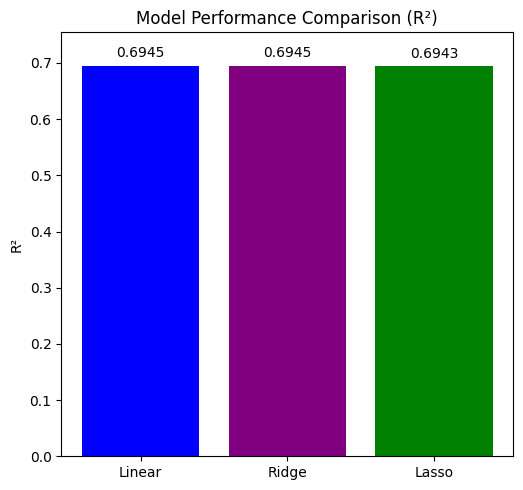

In [ ]:
models = ['Linear', 'Ridge', 'Lasso']
mse_values = [mse, mse_ridge, mse_lasso]
r2_values = [r2, r2_ridge, r2_lasso]

x = range(len(models))

plt.figure(figsize=(10, 5))

# Bar chart for R² Score
plt.subplot(1, 2, 1)
bars = plt.bar(x, r2_values, color=['blue', 'purple', 'green'])
# Add labels on top of each bar
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01,  # Position above the bar
             f'{r2_values[i]:.4f}',  # Display the R² value with 4 decimal places
             ha='center', va='bottom')  # Center horizontally, place above the bar
plt.xticks(x, models)
plt.ylabel('R²')
plt.title('Model Performance Comparison (R²)')
plt.ylim(0, max(r2_values) + 0.06)  # Adjust the upper limit of the y-axi
plt.tight_layout()
plt.show()


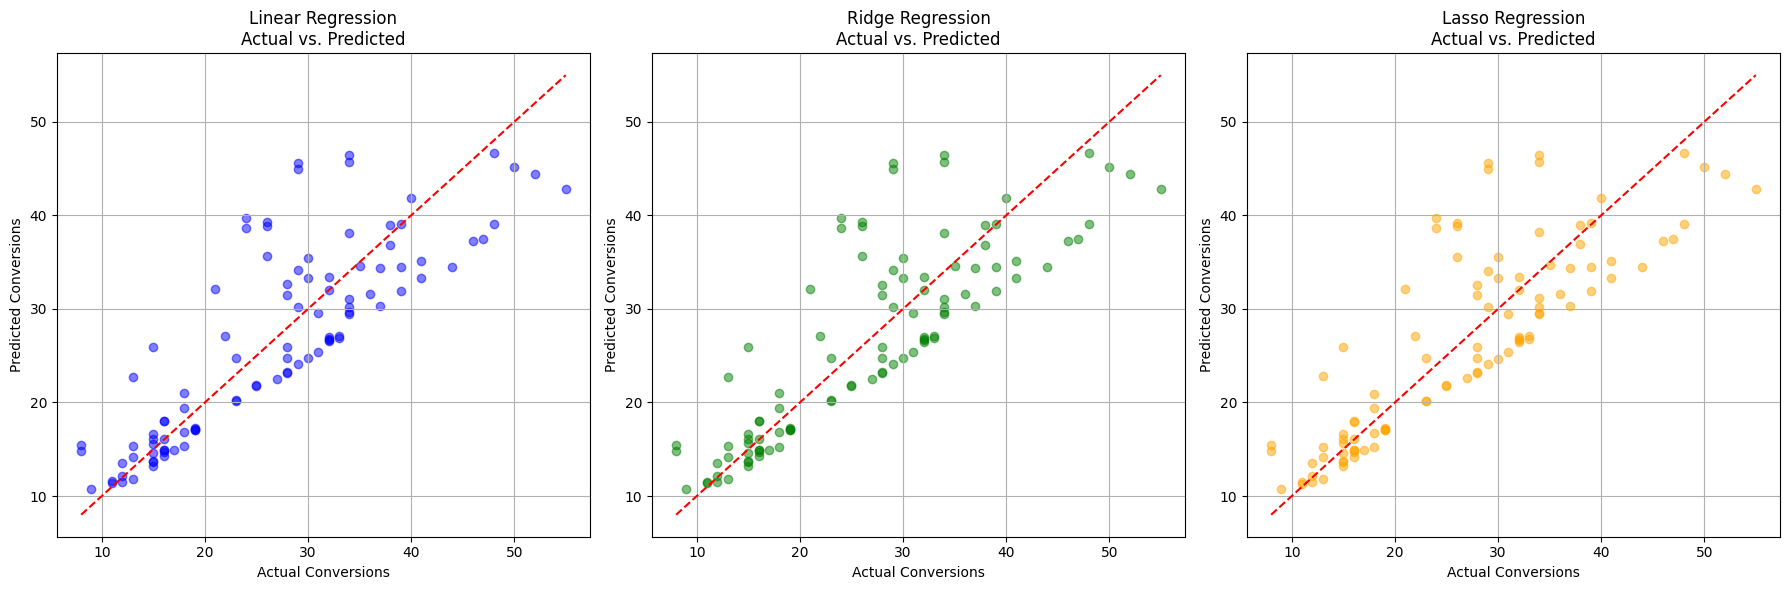

In [ ]:
# Create scatter plots for each model
plt.figure(figsize=(18, 6))

# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of equality
plt.title('Linear Regression\nActual vs. Predicted')
plt.xlabel('Actual Conversions')
plt.ylabel('Predicted Conversions')
plt.grid()

# Ridge Regression
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_ridge, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of equality
plt.title('Ridge Regression\nActual vs. Predicted')
plt.xlabel('Actual Conversions')
plt.ylabel('Predicted Conversions')
plt.grid()

# Lasso Regression
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_lasso, color='orange', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of equality
plt.title('Lasso Regression\nActual vs. Predicted')
plt.xlabel('Actual Conversions')
plt.ylabel('Predicted Conversions')
plt.grid()

plt.tight_layout()
plt.show()


## Data Input and Results


### Data Input

In [ ]:
data_input = pd.DataFrame({
    'Clicks': [50],
    'Impressions': [1000],
    'CPC': [1],
})

### Linear Regression Results

In [ ]:
linear_prediction = linear_model.predict(data_input)

In [ ]:
print(f"Predicted Conversions - Multiple Regression: {linear_prediction[0]:.2f}")

Predicted Conversions - Multiple Regression: 4.02


### Ridge Regression Results

In [ ]:
ridge_prediction = ridge_model.predict(data_input)


In [ ]:
print(f"Predicted Conversions - Ridge: {ridge_prediction[0]:.2f}")

Predicted Conversions - Ridge: 4.01


### Lasso Regression Results

In [ ]:
lasso_prediction = lasso_model.predict(data_input)

In [ ]:
print(f"Predicted Conversions - Lasso: {lasso_prediction[0]:.2f}")

Predicted Conversions - Lasso: 3.99


## User Data Input and Results

In [ ]:
# User Input
user_input = []
for column in X.columns:
    value = float(input(f"Digite o valor para {column}: "))
    user_input.append(value)

Digite o valor para Clicks: 200
Digite o valor para Impressions: 1800
Digite o valor para CPC: 1


In [ ]:
input_df = pd.DataFrame([user_input], columns=X.columns)

In [ ]:
linear_prediction = linear_model.predict(input_df)[0]
ridge_prediction = ridge_model.predict(input_df)[0]
lasso_prediction = lasso_model.predict(input_df)[0]

In [ ]:
print("\nPredictions Results:")
print(f"Multiple Linear Regression Prediction: {linear_prediction:.2f}")
print(f"Ridge Regression Prediction: {ridge_prediction:.2f}")
print(f"Lasso Regression Prediction: {lasso_prediction:.2f}")


Predictions Results:
Multiple Linear Regression Prediction: 10.83
Ridge Regression Prediction: 10.82
Lasso Regression Prediction: 10.80


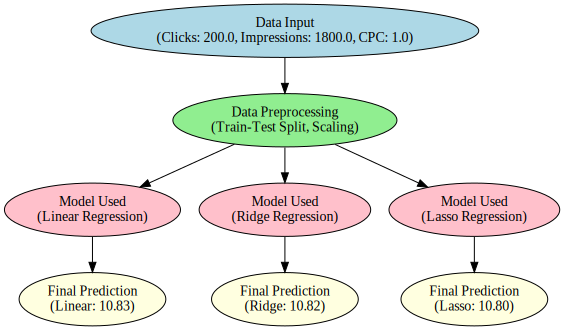

In [ ]:
# Get the input values for the flowchart
clicks = input_df['Clicks'].values[0]
impressions = input_df['Impressions'].values[0]
cpc = input_df['CPC'].values[0]

dot = Digraph()

# Add the blocks with different colors
dot.node('A', f'Data Input\n(Clicks: {clicks}, Impressions: {impressions}, CPC: {cpc})', shape='ellipse', style='filled', fillcolor='lightblue')
dot.node('B', 'Data Preprocessing\n(Train-Test Split, Scaling)', shape='ellipse', style='filled', fillcolor='lightgreen')
dot.node('C1', 'Model Used\n(Linear Regression)', shape='ellipse', style='filled', fillcolor='pink')
dot.node('C2', 'Model Used\n(Ridge Regression)', shape='ellipse', style='filled', fillcolor='pink')
dot.node('C3', 'Model Used\n(Lasso Regression)', shape='ellipse', style='filled', fillcolor='pink')
dot.node('D1', f'Final Prediction\n(Linear: {linear_prediction:.2f})', shape='ellipse', style='filled', fillcolor='lightyellow')
dot.node('D2', f'Final Prediction\n(Ridge: {ridge_prediction:.2f})', shape='ellipse', style='filled', fillcolor='lightyellow')
dot.node('D3', f'Final Prediction\n(Lasso: {lasso_prediction:.2f})', shape='ellipse', style='filled', fillcolor='lightyellow')

# Add the arrows between blocks
dot.edge('A', 'B')
dot.edge('B', 'C1')
dot.edge('B', 'C2')
dot.edge('B', 'C3')
dot.edge('C1', 'D1')
dot.edge('C2', 'D2')
dot.edge('C3', 'D3')

# Display the diagram inline
display(dot)